# Recommendation Engines

The goal of building recommendation engines includes:

* **Similar item recommendations**: surfacing similar items to users. This approach generates recommendations for items that are similar to an item you specify.
* **Personalized rankings**: a list of recommended items that are re-ranked for a specific user.
* **New item recommendations**: Offering the right recommendations when new items are added to your catalog. This is one of the most challenging problems in building relevant recommendations.

## How does a recommendation engine work?

Here is the high-level idea:

* recommend items to a user which are most popular among all the users
* divide the users into multiple segments based on their preferences (user features) and recommend items to them based on the segment they belong to

### Content based filtering

This algorithm recommends products which are similar to the ones that a user has liked in the past.

#### But what does **"similar"** mean in case of movies, musics, books, etc?

First we need to  save all the information related to each user in a vector form (**profile vector**). This vector contains the past behavior of the user, for example the movies liked/disliked by the user and the ratings given by them.

All the information related to items is stored in another vector called the **item vector**. For example, item vector contains the details of each movie, like genre, cast, director, etc.

Once we collect the data abour users and items in vectors, we can do vector operations including calculating their distance.

One common approach to measure similarity between vectors is **cosine similarity**. Cosine Similarity measures the cosine of the angle between two **non-zero** vectors of an inner product space. This similarity measurement is particularly concerned with orientation, rather than magnitude. 

![image](./img/cosine-similarity-1007790.jpeg) 


Based on the cosine value, which ranges between -1 to 1, the items are then arranged in descending order and you can use the result to recommend top-n items.

##### Advantages and Disadvantages:

Advantages:
* No need for data on other users when applying to similar users.
* Able to recommend to users with unique tastes.
* Able to recommend new & popular items
* Explanations for recommended items.

Disadvantages:
* Finding the appropriate feature is hard.
* Doesn’t recommend items outside the user profile.
    * this is due to the "**non-zero** vectors" condition. In other words, this alrogrithm is limited to recommending items that are of the same type. It will never recommend products which the user has not bought or liked in the past. So if a user has watched or liked only action movies in the past, the system will recommend only action movies. It’s a very narrow way of building an engine.

------

### Collaborative filtering

The collaborative filtering algorithm uses “User Behavior” for recommending items. This is one of the most commonly used algorithms in the industry as it is not dependent on any additional information. Collaborative filtering is based on the idea that similar people (based on the data) generally tend to like similar things. 


* User-User collaborative filtering: This algorithm first finds the similarity score between users. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously.

![image](https://miro.medium.com/max/720/0*o0zVW2O6Rv-LI5Mu.png) 
source: https://miro.medium.com/max/720/0*o0zVW2O6Rv-LI5Mu.png


* Item-Item collaborative filtering: In this algorithm, we compute the similarity between each pair of items. Based on that, we will recommend similar movies which are liked by the users in the past.

* How do you determine which users or items are similar to one another?
* Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
* How do you measure the accuracy of the ratings you calculate?


no single answer!

Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. Depending on the choices you make, you end up with a type of collaborative filtering approach. 


##### Advantages and Disadvantages:

Advantages:
* No need for the domain knowledge because embedding are learned automatically.

Disadvantages:
* Hard to add any new features that may improve quality of model
* Cannot handle new items/users. It is called a **Cold Start**.
    * One possible solution could be to recommend the best selling products, i.e. the products which are high in demand. Another possible solution could be to recommend the products which would bring the maximum profit to the business.
* This algorithm is quite time consuming as it involves calculating the similarity for each user/items and then calculating prediction for each similarity score. 
   * One way of handling this problem is to select only a few users/items instead of all to make predictions


# Movie recommendation using MovieLens

https://grouplens.org/datasets/movielens/

Small: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shubhammehta21/movie-lens-small-latest-dataset")

# print("Path to dataset files:", path)

In [3]:
# Loading the data
df_ratings = pd.read_csv('/usr/local/google/home/amirimani/.cache/kagglehub/datasets/shubhammehta21/movie-lens-small-latest-dataset/versions/1/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_ratings.shape

(100836, 4)

<Axes: xlabel='rating', ylabel='Count'>

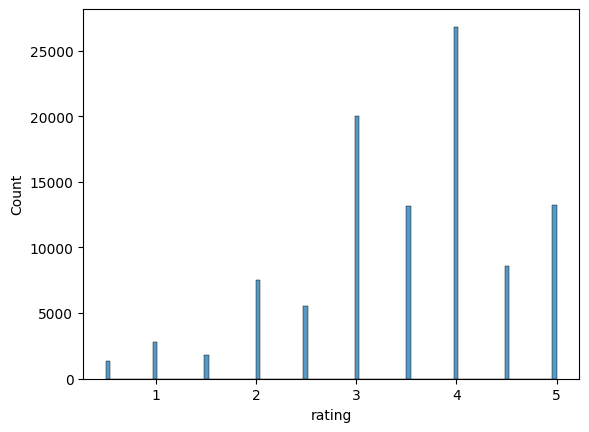

In [5]:
sns.histplot(data=df_ratings, x="rating")

In [6]:
df_movies = pd.read_csv("/usr/local/google/home/amirimani/.cache/kagglehub/datasets/shubhammehta21/movie-lens-small-latest-dataset/versions/1/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = pd.merge(df_ratings, df_movies, on="movieId", how="left")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


The dataset is a collection of ratings by a number of users for different movies. Let’s find out the average rating for each and every movie in the dataset.



In [8]:
df_avg_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_avg_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


since the rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [9]:
df_avg_ratings['total_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_avg_ratings.head()

,rating,total_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Let's pivot the tale to get user-movie matrix

In [10]:
user_movie_mat = df.pivot_table(index='userId', columns='title', values='rating')
user_movie_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Note that alot of them are NaN. usually with recommendation systems, we are dealing with highly sparse data since not every user has seen and rated all the movies.
with larger datasets, you mighy run into overflow and wasted memory. one solution is to work with **scipy.sparse_matrix**.

Now let's try a few approaches to build CF recommendation systems

In [11]:
# pick a movie before 2019
target_movie = "toy story"

In [12]:
df_movies[df_movies["title"].str.lower().str.contains(target_movie)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [13]:
df_movies["title"][df_movies["title"].str.lower().str.contains(target_movie)].loc[0]

'Toy Story (1995)'

In [14]:
target_movie = "Toy Story (1995)"

## 1. Correlation

In [15]:
%%time
target_corr = user_movie_mat.corrwith(user_movie_mat[target_movie])

/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


CPU times: user 1.93 s, sys: 6.34 ms, total: 1.94 s
Wall time: 1.94 s


In [16]:
target_corr.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [17]:
target_corr = target_corr.dropna()

In [18]:
target_corr = target_corr.reset_index()
target_corr.columns = ["title", "corr"]

In [19]:
target_corr

,title,corr
0,"'burbs, The (1989)",0.240563
1,(500) Days of Summer (2009),0.353833
2,*batteries not included (1987),-0.427425
3,10 Cent Pistol (2015),1.000000
4,10 Cloverfield Lane (2016),-0.285732
...,...,...
4762,[REC] (2007),0.129185
4763,eXistenZ (1999),0.333282
4764,xXx (2002),-0.244733
4765,xXx: State of the Union (2005),0.129969


In [20]:
target_corr = pd.merge(target_corr, df_avg_ratings, on="title")
target_corr = target_corr.sort_values(by='corr', ascending=False)
target_corr.head()

,title,corr,rating,total_ratings
2383,Land Before Time III: The Time of the Great Gi...,1.0,2.166667,3
1421,Faster Pussycat! Kill! Kill! (1965),1.0,3.700000,5
176,Amen. (2002),1.0,3.833333,3
2584,"Machine Girl, The (Kataude mashin gâru) (2008)",1.0,2.250000,2
4570,Waydowntown (2000),1.0,3.666667,3


In [21]:
target_corr[target_corr['total_ratings']>100].head(3)

,title,corr,rating,total_ratings
4351,Toy Story (1995),1.000000,3.920930,215
2100,"Incredibles, The (2004)",0.643301,3.836000,125
1459,Finding Nemo (2003),0.618701,3.960993,141


## 2. KNN

In [22]:
from operator import itemgetter 
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import NearestNeighbors

remember here I want to find similar movies...so have to transpose user_movie_mat to make it easier to work with

**KNN can be very sensitive to the scale of data as it relies on computing the distances.**

In [23]:
user_movie_mat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [24]:
knn_mat = user_movie_mat.T
knn_mat = knn_mat.fillna(0)

In [25]:
knn_mat

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [26]:
knn_mat.iloc[:,:] = Normalizer().fit_transform(knn_mat)

In [27]:
knn = NearestNeighbors(metric='cosine', algorithm='auto')

In [28]:
knn.fit(knn_mat)

distances, indices = knn.kneighbors(knn_mat, n_neighbors=6)

In [29]:
# get index for the target movie
index_for_movie = knn_mat.index.tolist().index(target_movie)

# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
sim_movies.pop(0)

8871

In [30]:
sim_movies = indices[index_for_movie].tolist()
sim_movies

[8871, 8872, 4662, 4337, 8001, 3158]

In [31]:
print(itemgetter(*sim_movies)(knn_mat.index.tolist()))

('Toy Story (1995)', 'Toy Story 2 (1999)', 'Jurassic Park (1993)', 'Independence Day (a.k.a. ID4) (1996)', 'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)')


### using cosine similarity 

In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Create a movie-user matrix
movie_user_matrix = df_ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Calculate cosine similarity between movies
movie_similarity = cosine_similarity(movie_user_matrix)
movie_similarity_df = pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

def get_movie_recommendations(movie_id, num_recommendations=5):
    # Check if the movie ID exists in the dataset
    if movie_id not in movie_similarity_df.index:
        return f"Movie ID {movie_id} not found in the dataset."

    # Get similar movies
    similar_movies = movie_similarity_df[movie_id].sort_values(ascending=False)[1:]  # Exclude the movie itself

    # Get the top recommended movies based on similarity
    top_similar_movies = similar_movies.head(num_recommendations).index

    # Get movie titles
    recommended_movies = df_movies[df_movies['movieId'].isin(top_similar_movies)]

    return recommended_movies[['movieId', 'title', 'genres']], similar_movies[top_similar_movies]

Recommended Movies based on Movie ID 1
      movieId                                      title  \
224       260  Star Wars: Episode IV - A New Hope (1977)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
615       780       Independence Day (a.k.a. ID4) (1996)   
2355     3114                         Toy Story 2 (1999)   

                                           genres  
224                       Action|Adventure|Sci-Fi  
314                      Comedy|Drama|Romance|War  
418              Action|Adventure|Sci-Fi|Thriller  
615              Action|Adventure|Sci-Fi|Thriller  
2355  Adventure|Animation|Children|Comedy|Fantasy  
Recommendations Scores:
movieId
3114    0.572601
480     0.565637
780     0.564262
260     0.557388
356     0.547096
Name: 1, dtype: float64


In [41]:
movie_id = 1 
recommended_movies, recommendations = get_movie_recommendations(movie_id)

print("Recommended Movies based on Movie ID", movie_id)
print(recommended_movies)
print("Recommendations Scores:")
print(recommendations)


Recommended Movies based on Movie ID 1
      movieId                                      title  \
224       260  Star Wars: Episode IV - A New Hope (1977)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
615       780       Independence Day (a.k.a. ID4) (1996)   
2355     3114                         Toy Story 2 (1999)   

                                           genres  
224                       Action|Adventure|Sci-Fi  
314                      Comedy|Drama|Romance|War  
418              Action|Adventure|Sci-Fi|Thriller  
615              Action|Adventure|Sci-Fi|Thriller  
2355  Adventure|Animation|Children|Comedy|Fantasy  
Recommendations Scores:
movieId
3114    0.572601
480     0.565637
780     0.564262
260     0.557388
356     0.547096
Name: 1, dtype: float64
